In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier


In [2]:
model = joblib.load("outputs/model_rf/rf_model__completo_2025-09-20_16-21-22.sav")
model.classes_

array([0, 1])

In [3]:
X_train = pd.read_csv("outputs/data_outputs/X_train_sample_imp_2025-09-20_16-21-22.csv",index_col=0)
y_train=pd.read_csv("outputs/data_outputs/y_train_sample_2025-09-20_16-21-22.csv",index_col=0)
print(X_train.shape , y_train.shape)

(4085, 1451) (4085, 1)


In [4]:
df_cluster=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_5_2025-09-20_16-21-22.csv",index_col=0)
df_cluster

,cluster,original_class
195,0,0
231,2,0
291,4,1
356,0,0
621,2,0
...,...,...
977180,3,1
977956,2,0
978204,4,1
978209,0,0


In [5]:
cluster_distribucion=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_distribution_5_2025-09-20_16-21-22.csv")
cluster_distribucion

,cluster,0,1,average_prob_baja
0,0,985,59,0.024815
1,1,304,590,0.311128
2,2,570,182,0.088246
3,3,44,574,0.791193
4,4,97,680,0.588194


In [6]:
n_por_cluster = cluster_distribucion[["0","1"]].sum(axis=1)
cluster_distribucion["ratio"] = cluster_distribucion["1"]/n_por_cluster
cluster_distribucion

,cluster,0,1,average_prob_baja,ratio
0,0,985,59,0.024815,0.056513
1,1,304,590,0.311128,0.659955
2,2,570,182,0.088246,0.242021
3,3,44,574,0.791193,0.928803
4,4,97,680,0.588194,0.875161


In [7]:
df=X_train.copy()
df["cluster"] = df_cluster["cluster"]

In [8]:
# sacar las features más importantes
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index=feature_names)

feature_selected = feature_importance_series.sort_values(ascending=False)

n_top = 20 # cantidad de variables a evaluar.
top_overall_features = feature_selected.head(n_top).index.tolist()

# cluster_series_aligned = pd.Series(clusters, index=Xtrain_rf.index)

cluster_median_values = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    cluster_indices = df_cluster[df_cluster["cluster"] ==cluster ].index
    cluster_data = X_train.loc[cluster_indices, top_overall_features]

    # Usar el estadístico de su preferencia
    values = cluster_data.median()
    cluster_median_values[f'Cluster {cluster}'] = values

top_overall_features_df = pd.DataFrame(cluster_median_values)
display(top_overall_features_df)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
ctrx_quarter,121.0000,53.000,111.5000,3.000,14.00
MAX_ctrx_quarter,138.0000,71.000,129.5000,6.000,21.00
ctrx_quarter_lag_1,121.0000,58.000,112.0000,3.000,16.00
MAX_mpasivos_margen,1508.9650,683.920,1538.9900,9.315,95.83
MIN_ctrx_quarter,106.0000,42.000,93.5000,0.000,11.00
ctrx_quarter_lag_2,121.0000,60.500,112.0000,3.000,17.00
MAX_mcaja_ahorro,67785.6250,23332.615,53019.8200,0.000,1299.34
mcaja_ahorro,31584.6400,7203.225,20553.7800,0.000,47.01
ratio_mcaja_ahorro_ccaja_ahorro,15661.7975,3299.575,9597.0325,0.000,23.13
mpasivos_margen,757.7650,264.115,828.8400,2.430,22.30


In [9]:
def compare_cluster_stats(data, df_cluster, variable_name, target_cluster):

    variable_data = data[variable_name]

    target_cluster_indices = df_cluster[df_cluster["cluster"] == target_cluster].index
    target_cluster_data = variable_data.loc[target_cluster_indices] # Keep NaNs for counting

    rest_indices =  df_cluster[df_cluster["cluster"] != target_cluster].index
    rest_data = variable_data.loc[rest_indices] # Keep NaNs for counting

    target_cluster_desc = target_cluster_data.dropna().describe()
    rest_desc = rest_data.dropna().describe()

    summary_df = pd.DataFrame({
        f'Cluster {target_cluster}': target_cluster_desc,
        f'Rest of Clusters': rest_desc
    })

    summary_df.loc['unique'] = [target_cluster_data.nunique(), rest_data.nunique()]
    summary_df.loc['missing'] = [target_cluster_data.isnull().sum(), rest_data.isnull().sum()]

    return summary_df

print(f"'mcaja_ahorro' - Cluster 2 vs. Rest")
compare_cluster_stats(X_train, df_cluster, 'mpayroll', 4)



'mcaja_ahorro' - Cluster 2 vs. Rest


,Cluster 4,Rest of Clusters
count,777.000000,3.308000e+03
mean,820.297181,5.214103e+04
std,10846.261368,1.656699e+05
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,7.514430e+04
max,263817.080000,6.044532e+06
unique,18.000000,1.166000e+03
missing,0.000000,0.000000e+00


In [10]:
important_features_by_cluster = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    print(f"Training model for Cluster {cluster} vs. Rest...")
    y_binary = (df_cluster["cluster"] == cluster).astype(int)

    model = RandomForestClassifier(n_estimators=100, random_state=17, class_weight='balanced') # Added class_weight for imbalanced data
    model.fit(X_train, y_binary)

    importances = model.feature_importances_
    feature_names = X_train.columns

    indices = np.argsort(importances)[::-1]

    important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

Training model for Cluster 0 vs. Rest...
Training model for Cluster 1 vs. Rest...
Training model for Cluster 2 vs. Rest...
Training model for Cluster 3 vs. Rest...
Training model for Cluster 4 vs. Rest...


In [11]:
for k in range(5):
    print(k)
    print(important_features_by_cluster[k][:20])

0
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mpayroll_lag_1', 'MAX_mpayroll', 'mpayroll_lag_2', 'mpayroll', 'cpayroll_trx_lag_1', 'cpayroll_trx_lag_2', 'MAX_cpayroll_trx', 'MAX_mcomisiones_mantenimiento', 'cpayroll_trx', 'slope_mcomisiones_mantenimiento', 'MAX_ccomisiones_mantenimiento', 'mcomisiones_mantenimiento', 'delta_2_mpayroll', 'delta_2_mcomisiones_mantenimiento', 'mautoservicio', 'mcomisiones_mantenimiento_lag_1', 'MAX_ctarjeta_debito_transacciones', 'mautoservicio_lag_1']
1
['MAX_ctrx_quarter', 'ctrx_quarter', 'slope_mcomisiones_mantenimiento', 'mpayroll_lag_2', 'MIN_cpayroll_trx', 'MIN_mpayroll', 'ctrx_quarter_lag_1', 'MIN_ctrx_quarter', 'ctrx_quarter_lag_2', 'MAX_mpayroll', 'mpayroll', 'mpayroll_lag_1', 'MAX_cpayroll_trx', 'mcaja_ahorro', 'MAX_mpasivos_margen', 'delta_2_mcomisiones_mantenimiento', 'ratio_mcaja_ahorro_ccaja_ahorro', 'MAX_mcuentas_saldo', 'MAX_mcaja_ahorro', 'mcaja_ahorro_lag_1']
2
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mtarjeta_visa_consumo', 'MIN_mtarjeta_visa_co

In [112]:
compare_cluster_stats(X_train, df_cluster, 'slope_mcomisiones_mantenimiento',4)

,Cluster 4,Rest of Clusters
count,777.000000,3308.000000
mean,241.229855,132.393375
std,383.298907,357.813611
min,-1706.668000,-3548.080000
25%,0.000000,0.000000
50%,163.640000,0.000000
75%,532.212000,163.640000
max,2074.459000,1542.540000
unique,80.000000,167.000000
missing,0.000000,0.000000


Index([0, 1, 2, 3, 4], dtype='int64', name='cluster')

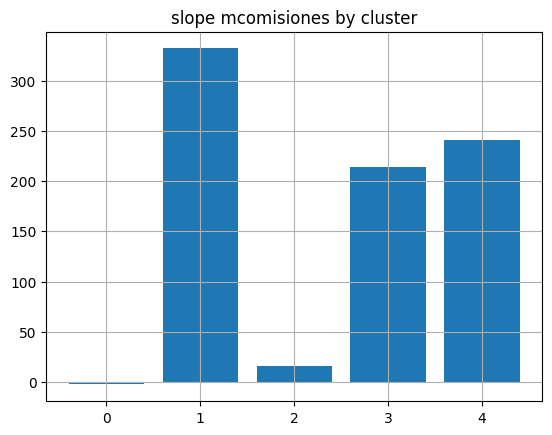

In [ ]:
slope_mcomisiones_by_cluster=df.groupby("cluster")["slope_mcomisiones_mantenimiento"].mean()
plt.bar(slope_mcomisiones_by_cluster.index,slope_mcomisiones_by_cluster.values )
plt.title("slope mcomisiones by cluster")
plt.grid(True)

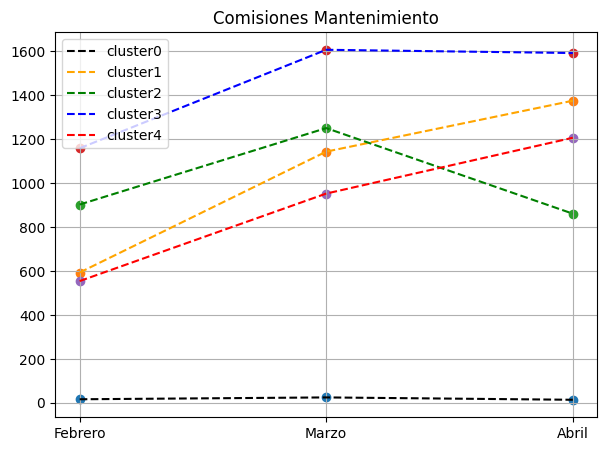

In [18]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","orange","green","blue","red"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mcomisiones_mantenimiento_lag_2","mcomisiones_mantenimiento_lag_1","mcomisiones_mantenimiento"]].mean(axis=0)
    ax.scatter([0,1,2] ,means)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Comisiones Mantenimiento")
plt.grid(True)


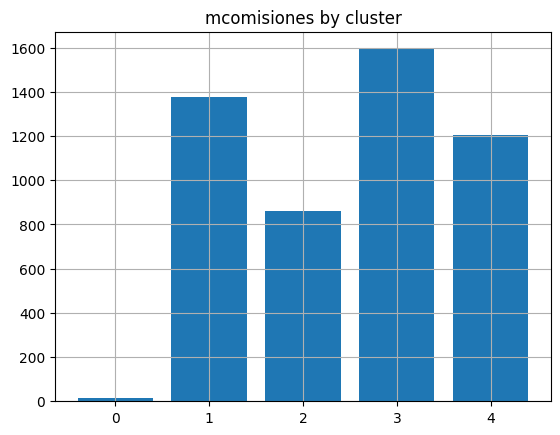

In [12]:
mcomisiones_by_cluster=df.groupby("cluster")["mcomisiones_mantenimiento"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values )
plt.title("mcomisiones by cluster")
plt.grid(True)

In [83]:
compare_cluster_stats(X_train, df_cluster, 'mtarjeta_visa_consumo', 0)

,Cluster 0,Rest of Clusters
count,1044.000000,3041.000000
mean,32626.888496,17443.685367
std,43641.788920,39640.484023
min,0.000000,0.000000
25%,6834.350000,0.000000
50%,18706.555000,1874.730000
75%,40635.755000,18974.740000
max,381119.940000,544273.000000
unique,892.000000,1695.000000
missing,0.000000,0.000000


In [84]:
compare_cluster_stats(X_train, df_cluster, 'mtarjeta_visa_consumo', 2)

,Cluster 2,Rest of Clusters
count,752.000000,3333.000000
mean,47877.797713,15332.917765
std,60692.968000,32531.940004
min,0.000000,0.000000
25%,16002.070000,0.000000
50%,28806.560000,1747.770000
75%,53133.095000,17052.900000
max,544273.000000,474365.760000
unique,743.000000,1838.000000
missing,0.000000,0.000000


In [85]:
compare_cluster_stats(X_train, df_cluster, 'mtarjeta_visa_consumo', 1)

,Cluster 1,Rest of Clusters
count,894.000000,3191.000000
mean,15166.654463,23049.116170
std,32055.365636,43302.671641
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3674.375000,7446.130000
75%,16935.150000,27925.985000
max,474365.760000,544273.000000
unique,589.000000,2003.000000
missing,0.000000,0.000000


In [80]:
compare_cluster_stats(X_train, df_cluster, 'mtarjeta_visa_consumo', 2)

,Cluster 2,Rest of Clusters
count,752.000000,3333.000000
mean,47877.797713,15332.917765
std,60692.968000,32531.940004
min,0.000000,0.000000
25%,16002.070000,0.000000
50%,28806.560000,1747.770000
75%,53133.095000,17052.900000
max,544273.000000,474365.760000
unique,743.000000,1838.000000
missing,0.000000,0.000000


In [76]:
compare_cluster_stats(X_train, df_cluster, 'mautoservicio', 2)

,Cluster 2,Rest of Clusters
count,752.000000,3333.000000
mean,16996.611396,10179.154716
std,28730.713701,21507.275891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5180.755000,0.000000
75%,22478.877500,11282.200000
max,218736.540000,250675.190000
unique,488.000000,1347.000000
missing,0.000000,0.000000


In [71]:
compare_cluster_stats(X_train, df_cluster, 'mautoservicio', 0)

,Cluster 0,Rest of Clusters
count,1044.000000,3041.000000
mean,25567.014751,6582.246314
std,27623.318063,19140.404740
min,0.000000,0.000000
25%,5529.760000,0.000000
50%,17689.395000,0.000000
75%,36249.222500,2791.850000
max,223548.070000,250675.190000
unique,913.000000,927.000000
missing,0.000000,0.000000


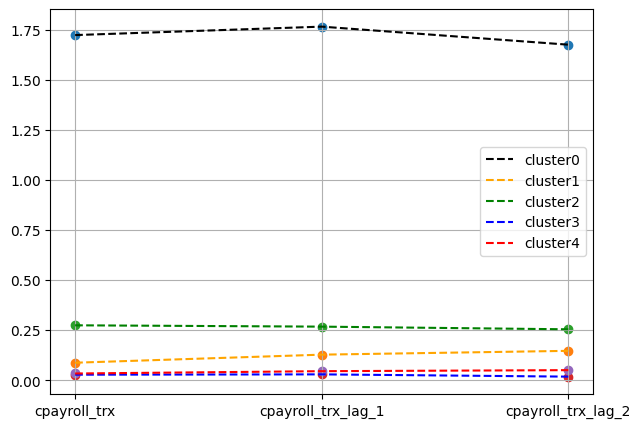

In [65]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","orange","green","blue","red"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["cpayroll_trx","cpayroll_trx_lag_1","cpayroll_trx_lag_2"]].mean(axis=0)
    ax.scatter([0,1,2] ,means)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["cpayroll_trx","cpayroll_trx_lag_1","cpayroll_trx_lag_2"])
plt.grid(True)


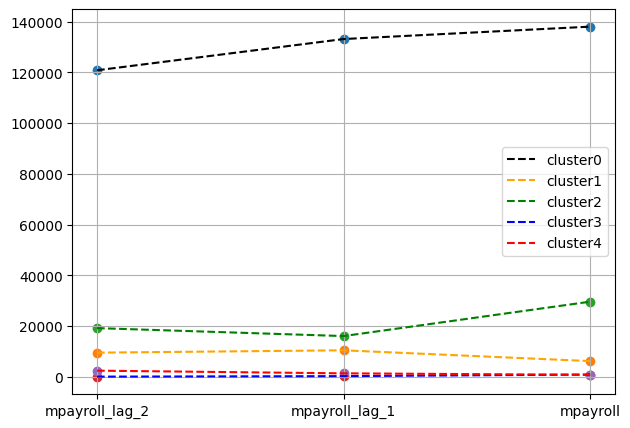

In [64]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","orange","green","blue","red"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mpayroll_lag_2","mpayroll_lag_1","mpayroll"]].mean(axis=0)
    ax.scatter([0,1,2] ,means)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2], ["mpayroll_lag_2","mpayroll_lag_1","mpayroll"])
plt.grid(True)


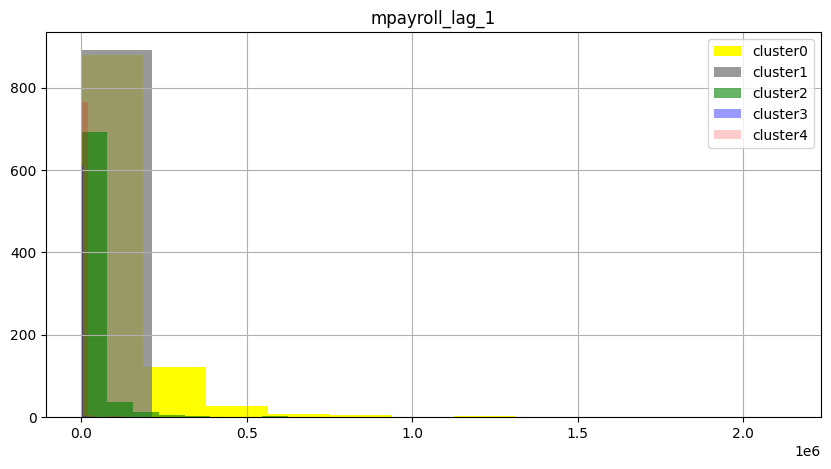

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
colors=["yellow","gray","green","blue","red"]
alfa=1
for k,c in enumerate(colors):
    f=(df["cluster"]==k )
    df.loc[f , ["mpayroll_lag_1"]].hist(color=c , alpha=alfa ,ax=ax , label=f'cluster{k}' )
    alfa-=0.2
ax.legend()
plt.show()